Possibilities at the beginning are: {'mb_0_0': 0, 'mb_0_1': 0, 'mb_1_0': 0, 'mb_1_1': 0, 'db_0_0': 0, 'db_0_1': 0, 'db_1_0': 0, 'db_1_1': 0, 'mo': 0, 'ad_0': 1, 'ad_1': 1, 'di_0': 0, 'di_1': 0, 'cut_0': 0, 'cut_1': 0}

0
X is 0.5415312670525969
ad_0
This was a  success
Possibilities are now:  {'mb_0_0': 0, 'mb_0_1': 0, 'mb_1_0': 0, 'mb_1_1': 0, 'db_0_0': 0, 'db_0_1': 0, 'db_1_0': 0, 'db_1_1': 0, 'mo': 0, 'ad_0': 1, 'ad_1': 1, 'di_0': 0, 'di_1': 0, 'cut_0': 0, 'cut_1': 0}

1
X is 35.35981499242219
cut_0
This was a  success
Possibilities are now:  {'mb_0_0': 10, 'mb_0_1': 5, 'mb_1_0': 0, 'mb_1_1': 0, 'db_0_0': 0, 'db_0_1': 0, 'db_1_0': 0, 'db_1_1': 0, 'mo': 1, 'ad_0': 1, 'ad_1': 1, 'di_0': 1, 'di_1': 0, 'cut_0': 15, 'cut_1': 0}

2
X is 17.799400999466776
mb_0_0
This was a  success
Possibilities are now:  {'mb_0_0': 10, 'mb_0_1': 5, 'mb_1_0': 0, 'mb_1_1': 0, 'db_0_0': 0, 'db_0_1': 0, 'db_1_0': 0, 'db_1_1': 0, 'mo': 1, 'ad_0': 1, 'ad_1': 1, 'di_0': 1, 'di_1': 0, 'cut_0': 15, 'cut_1': 0}

3

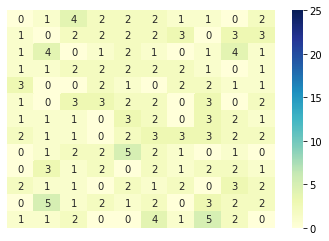

In [21]:
# UROP 2020

#### Comments : EvolveOneStep has been GREATLY improved, it is (kind of) working, the function can db (destroy bond) mb (make a bond)
####  and mo (move a virus)

# sys.auxS is a dictionnary which gathers all the possibilities (db_0_1 for exemple is destroy a bond between a receptor of type 1 and virus of type 2)
# Each possibility has been attributed a rate (in this example it would be koff of rec of type 1 + k_det of virus of type 2)
# Typical sys.auxS dictionnary:
# {'mb_0': 1, 'mb_1': 1, 'db_0_0': 2, 'db_0_1': 2, 'db_1_0': 2, 'db_1_1': 2, 'mo': 1}

# sys.nS gathers information on how many configurations are there for each possibility so for our example, it counts the number of receptors 1 and viruses 2 that can form a bond 
# Typical sys.nS dictionnary:
# {'mb_0': 350, 'mb_1': 250, 'db_0_0': 0, 'db_0_1': 0, 'db_1_0': 0, 'db_1_1': 0, 'mo': 100}

# These two dictionnaries help construct sys.S which is the main dictionnary for the evolveOneStep function
# Typical sys.S dictionnary:
# {'mb_0': 350, 'mb_1': 600, 'db_0_0': 600, 'db_0_1': 600, 'db_1_0': 600, 'db_1_1': 600, 'mo': 700}

# Remarks:
# For the "mb" (make bond) function i only did for the two types of viruses rather than type of virus and type of receptor (but this is an easy thing to do)
# There is a lot of room for improvement in the efficiency of the program but hopefully it works 

import numpy as np
import matplotlib.pyplot as plt
import math

# INPUTS

iteration_limit = 1000

inputSystem = {} # Dictionnary gathering all the inputs necessary for the simulation

# 1st key : "rec"

inputSystem[ "rec" ] = {}

inputSystem[ "rec" ][ "Type 1" ] = {}             # Key 1 of dictionnary rec : information on receptors of Type 1
inputSystem[ "rec" ][ "Type 1" ][ "kon" ] = 1
inputSystem[ "rec" ][ "Type 1" ][ "koff" ] = 1
inputSystem[ "rec" ][ "Type 1" ][ "N" ] = 100

inputSystem[ "rec" ][ "Type 2" ] = {}             # Key 2 of dictionnary rec : information on receptors of Type 2
inputSystem[ "rec" ][ "Type 2" ][ "kon" ] = 1
inputSystem[ "rec" ][ "Type 2" ][ "koff" ] = 1    # Add here other types if needed
inputSystem[ "rec" ][ "Type 2" ][ "N" ] = 100 

# 2nd key : "vir"

inputSystem[ "vir" ] = {}

inputSystem[ "vir" ][ "Type 1" ] = {}             # Key 1 of dictionnary vir : information on viruses of Type 1
inputSystem[ "vir" ][ "Type 1" ][ "Nlig" ] = 5
inputSystem[ "vir" ][ "Type 1" ][ "Ncut" ] = 1
inputSystem[ "vir" ][ "Type 1" ][ "k_att" ] = 1
inputSystem[ "vir" ][ "Type 1" ][ "k_det" ] = 1
inputSystem[ "vir" ][ "Type 1" ][ "k_ad" ] = 1
inputSystem[ "vir" ][ "Type 1" ][ "k_di" ] = 0
inputSystem[ "vir" ][ "Type 1" ][ "Nv" ] = 0

inputSystem[ "vir" ][ "Type 2" ] = {}             # Key 2 of dictionnary vir : information on viruses of Type 2
inputSystem[ "vir" ][ "Type 2" ][ "Nlig" ] = 5
inputSystem[ "vir" ][ "Type 2" ][ "Ncut" ] = 1
inputSystem[ "vir" ][ "Type 2" ][ "k_att" ] = 1
inputSystem[ "vir" ][ "Type 2" ][ "k_det" ] = 1
inputSystem[ "vir" ][ "Type 2" ][ "k_ad" ] = 1
inputSystem[ "vir" ][ "Type 2" ][ "k_di" ] = 0
inputSystem[ "vir" ][ "Type 2" ][ "Nv" ] = 0     # Could create a function to facilitate the construction of new types

# 3rd key : "dimensions"

inputSystem[ "dimensions" ] = {}
inputSystem[ "dimensions" ][ "side 1" ] = 10      # X Side 1 can be different from side 2 (creates a rectangle, otherwise the 2D surface is a square)
inputSystem[ "dimensions" ][ "side 2" ] = 13      # Y
inputSystem[ "dimensions" ][ "N_max_rec" ] = 25   # Number of receptors max per site

key_types = [ "Type 1", "Type 2", "Type 3", "Type 4" ]
nb_dict = { "0" : 0, "1": 1, "2": 2, "3": 3, "4": 4 }
recordOfActions = {}

# CLASSES

class System():
    def __init__( self, myVarSystem ):

        """
        This function is used to initiate the system
        
        Parameters 
        system (dictionary) : It is from this dictionary that the parameters of the system are known
            
        """
        self.nTypes_r = len( myVarSystem[ "rec" ] )
        self.nTypes_v = len( myVarSystem[ "vir" ] )
        
        self.site_occupancy = []
        self.virus_count = 0 # Counts the total number of viruses that have entered the system, is useful for the ID of viruses
        self.rec_count = 0
        
        self.S = {}      # Dictionnary for the evolveOneStep function
        
    # The following lists and dictionnaries are used solely to create the receptor and virus class (self.(...))

        count = 0                                    
        for i in myVarSystem[ "rec" ]:
            count += myVarSystem[ "rec" ][ i ][ "N" ]
        myVarSystem[ "dimensions" ][ "N" ] = count        # Number of receptors in the system at t = 0
        self.rec = [ i for i in range( count ) ]

        count = 0                                   
        for i in myVarSystem[ "vir" ]:
            count += myVarSystem[ "vir" ][ i ][ "Nv" ]
        myVarSystem[ "dimensions" ][ "Nv" ] = count        # Number of viruses in the system at t = 0
        self.vir = [ i for i in range( count ) ]
    
## Receptor part ##   
    
        self.rec_type = {}      # Auxiliary dict to help build the type attribute within the receptor class below
        self.rec_position = []  # Auxiliary list to help build the position attribute within the receptor class below
        self.rec_bond = []      # Auxiliary list to help build the bond attribute within the receptor class below   
        self.rec_type_nb = []
        
        count = 0                                           # This loop gives a list containing the type of each receptor according to their number
        for i in myVarSystem[ "rec" ]:                           # For instance, self.rec[ 2 ] is the type of the receptor number 2 (which is "Type 1")
            for j in range( myVarSystem[ "rec" ][ i ][ "N" ] ):
                self.rec_type[ count ] = key_types.index( i )
                self.rec_type_nb.append( i )
                count += 1
        
        Occ = 0                                              # This loop generates a 2D array containing the position of each receptor according to their number
        for i in range( myVarSystem[ "dimensions" ][ "N" ] ):                     # First, we generate a random position
            Occ = round( ( myVarSystem[ "dimensions" ][ "side 1" ] * myVarSystem[ "dimensions" ][ "side 2" ] - 1 ) * np.random.rand() ) 
            X = int( Occ / myVarSystem[ "dimensions" ][ "side 1" ] )  
            Y = Occ % myVarSystem[ "dimensions" ][ "side 1" ]
            pos = [ X, Y ]                                                   # Then, we check if there aren't too many receptors on this position/site
            while self.rec_position.count( pos ) >= myVarSystem[ "dimensions" ][ "N_max_rec" ]:
                Occ = round( ( myVarSystem[ "dimensions" ][ "side 1" ] * myVarSystem[ "dimensions" ][ "side 2" ] - 1 ) * np.random.rand() )
                X = int( Occ / myVarSystem[ "dimensions" ][ "side 1" ] ) 
                Y = Occ % myVarSystem[ "dimensions" ][ "side 1" ]
                pos = [ X, Y ]
            self.rec_position.append( pos )                                  # We can then add it to the list of position according to the numbers of the receptors
        self.rec_position = np.array( self.rec_position )                    # Finally we transorm it into a 2D array that is easier to manipulate

        for i in range( myVarSystem[ "dimensions" ][ "N" ] ):     # This loop generates a list of bonds according to the numbers of the receptors (which at the beginning are all 2 empty lists)
            self.rec_bond.append( [] )
            for j in range( 2 ):                             # The 2 here is because a receptor can only make 2 bonds
                self.rec_bond[ i ].append( [] )
                        
        for i in range( myVarSystem[ "dimensions" ][ "N" ] ):      ## Generate the class receptor for each one with the 3 lists and dict created before
            self.rec_count += 1
            self.rec[ i ] = receptor( self.rec_type[ i ], self.rec_position[ i ], self.rec_bond[ i ], i, self.rec_type_nb[ i ] ) 
     
 # mySystem.rec[ i ].bonds gives the bonds of the receptor number i (it's a list)               This is the only thing 
 # mySystem.rec[ i ].position gives the position of the receptor number i (it's a 2D array)     to really keep in mind
 # mySystem.rec[ i ].type gives the type of the receptor number i (either 0 or 1)
 # mySystem.rec[ i ].id gives the id of the receptor number i in the list
 # mySystem.rec[ i ].type_nb gives the of the receptor number i (either "Type 1" or "Type 2")

## Virus part ##
    
        self.vir_type = {}
        self.vir_position = []
        self.vir_bond = []
        self.vir_type_nb = []

    # As the attributes searched for the viruses are exactly the same, you'll find that the loops are extremely similar
    # Therefore, I would advise to take a look at the comments above if something isn't understood
    
    # Si on veut apparaitre avec 0 virus il faut supprimer les lignes suivantes
    
        condition = 0
    
        for i in myVarSystem[ "vir" ]:
            if myVarSystem[ "vir" ][ i ][ "Nv" ] != 0:
                condition = 1
        
        if condition == 1:
        
            Occ = 0
            for i in range( myVarSystem[ "dimensions" ][ "Nv" ] ): 
                Occ = round( ( myVarSystem[ "dimensions" ][ "side 1" ] * myVarSystem[ "dimensions" ][ "side 2" ] - 1 ) * np.random.rand() )
                X = int( Occ / myVarSystem[ "dimensions" ][ "side 1" ] )  
                Y = Occ % myVarSystem[ "dimensions" ][ "side 1" ]
                pos = [ X, Y ]
                while self.vir_position.count( pos ) >= 1:
                    Occ = round( ( myVarSystem[ "dimensions" ][ "side 1" ] * myVarSystem[ "dimensions" ][ "side 2" ] - 1 ) * np.random.rand() )
                    X = int( Occ / myVarSystem[ "dimensions" ][ "side 1" ] ) 
                    Y = Occ % myVarSystem[ "dimensions" ][ "side 1" ]
                    pos = [ X, Y ]
                self.vir_position.append( pos )
            self.vir_position = np.array( self.vir_position )

            count = 0                                           
            for i in myVarSystem[ "vir" ]:                           
                for j in range( myVarSystem[ "vir" ][ i ][ "Nv" ] ):
                    self.vir_type[ count ] = i                       # Type of virus 0 or 1
                    self.vir_type_nb.append( key_types.index( i ) )  # Type of virus "Type 1" or "Type 2"
                    count += 1
        
            for i in range( myVarSystem[ "dimensions" ][ "Nv" ] ):
                self.vir_bond.append( [] )
                for k in range( myVarSystem[ "vir" ][ self.vir_type[ i ] ][ "Nlig" ] ):
                    self.vir_bond[ i ].append( [] )
        
            for i in range( myVarSystem[ "dimensions" ][ "Nv" ] ):
                self.virus_count += 1
                self.vir[ i ] = virus( self.vir_type[ i ], self.vir_position[ i ], self.vir_bond[ i ], i, self.vir_type_nb[ i ] )
  
 # mySystem.vir[ i ].bonds gives the bonds of the virus number i (it's a list)               This is the only thing 
 # mySystem.vir[ i ].position gives the position of the virus number i (it's a 2D array)     to really keep in mind
 # mySystem.vir[ i ].type gives the type of the virus number i (either 0 or 1)
 # mySystem.vir[ i ].id gives the id of the virus number i in the list
 # mySystem.vir[ i ].type_nb gives the type of the virus number i (either "Type 1" or "Type 2")

## Useful Information for S dict ##
        
        self.auxS = {}
        count_r = 0
        count_v = 0
        i = 0
        for count_r in range( len( myVarSystem[ "rec" ] ) ):
            for count_v in range( len( myVarSystem[ "vir" ] ) ):
                self.auxS[ "mb_{0}_{1}".format( count_r, count_v ) ] = myVarSystem[ "rec" ][ "Type {0}".format( count_r + 1 ) ][ "kon" ] + myVarSystem[ "vir" ][ "Type {0}".format( count_v + 1 ) ][ "k_att" ] 
        
        count_r = 0
        count_v = 0
        i = 0
        for count_r in range( len( myVarSystem[ "rec" ] ) ):
            for count_v in range( len( myVarSystem[ "vir" ] ) ):
                self.auxS[ "db_{0}_{1}".format( count_r, count_v ) ] = myVarSystem[ "rec" ][ "Type {0}".format( count_r + 1 ) ][ "koff" ] + myVarSystem[ "vir" ][ "Type {0}".format( count_v + 1 ) ][ "k_det" ]
                i += 1
        
        self.auxS[ "mo" ] = 1
        
        for count_v in range( len( myVarSystem[ "vir" ] ) ):
            self.auxS[ "ad_{0}".format( count_v ) ] = inputSystem[ "vir" ][ "Type {0}".format( count_v + 1 ) ][ "k_ad" ]
        
        for count_v in range( len( myVarSystem[ "vir" ] ) ):
            self.auxS[ "di_{0}".format( count_v ) ] = inputSystem[ "vir" ][ "Type {0}".format( count_v + 1 ) ][ "k_di" ]
        
        for count_v in range( len( myVarSystem[ "vir" ] ) ):
            self.auxS[ "cut_{0}".format( count_v ) ] = inputSystem[ "vir" ][ "Type {0}".format( count_v + 1 ) ][ "Ncut" ]

        return
    
    def index( self, ID, obj ):
        
        """
        Finds the index of a given ID (useful for when you want to modify bonds)
        
        Parameters :
        ID (int) = The ID value of the object
        obj (string) = Can either be "rec" or "vir" and is used to describe the type of our object
        
        Return:
        index (int) = The index if the given ID
        
        """
        count = 0
        
        if obj == "rec":
            for i in self.rec:
                if i.id == ID:
                    index = count
                count += 1
        
        if obj == "vir":
            for i in self.vir:
                if i.id == ID:
                    index = count
                count += 1
        
        return index
    
    def actualiseSystem( self, myVarSystem ): 
        
        """This function creates the dictionnary mySystem.nS (see at the top of the code its function).
        It thus counts the number of bonds that can be made or are already made and between viruses and receptors of which type"""
        
        self.nS = {}

        for i in list( self.auxS.keys() ):
            self.nS[ i ] = 0

        for i in self.vir :             # In all viruses
            if i.status == "active":    # In all LIVING viruses 
                count = 0
                for j in range( len( i.bonds ) ):
                    if i.bonds[ j ] == []:     # In this case there is an available bonding spot 
                        for jj in self.rec:    # In all receptors
                            if list( jj.position ) == list( i.position ) and jj.id not in i.bonds: # If receptor is on the same spot as the virus but arent bonded toegether
                                self.nS[ "mb_{0}_{1}".format( i.type, jj.type ) ] += 1
                                self.nS[ "cut_{0}".format( i.type ) ] += 1
                    elif i.bonds[ j ] != []:   # In this case the living virus has a bonding spot already occupied 
                        self.nS[ "db_{0}_{1}".format( i.type, self.rec[ i.bonds[ j ] ].type ) ] += 1
                        count += 1
                if count == 0: # The living virus has no bonds
                    self.nS[ "mo" ] += 1
                    self.nS[ "di_{0}".format( i.type ) ] += 1
                    
        for i in myVarSystem[ "vir" ]:  # The number of cases where a receptor can be deleted = nb of cutting proteins * nb of unbonded rec
            self.nS[ "cut_{0}".format( key_types.index( i ) ) ] *= myVarSystem[ "vir" ][ i ][ "Ncut" ]
        
        for count_v in range( len( myVarSystem[ "vir" ] ) ):
            self.nS[ "ad_{0}".format( count_v ) ] = 1 # Comment compter le nombre de spot available ? 
        
        # Multiplying nS and auxS to get the final S dictionnary
        
        for i in self.nS.keys():
            if list( self.nS.keys() ).index( i ) == 0:
                self.S[ i ] = self.nS[ i ] * self.auxS[ i ]
            else:
                self.S[ i ] = self.nS[ i ] * self.auxS[ i ] + self.S[ list( self.nS.keys() )[ list( self.nS.keys() ).index( i ) - 1 ] ]
              
        return 
    
    def myMap2 ( self, myVarSystem, maptype ):
    
        """
        Generates a heatmap that indicates the position of the receptors or the viruses that are present in the system.
        Parameters :
        maptype (int) = 1 for receptors and 2 for viruses
        """
    
        import seaborn as sns
    
        side2 = myVarSystem[ "dimensions" ][ "side 1" ]
        side1 = myVarSystem[ "dimensions" ][ "side 2" ]
    
        tab = [ [] for i in range ( side1 ) ]
   
        if maptype == 1:
            for i in range( len ( tab ) ):
                for y in range( side2 ):
                    N = 0
                    for z in self.rec: # Il faut ecrire le nombre max de recepteur
                        if z.status.lower() == "active":
                            pos = z.position
                            if pos[ 0 ] == i and pos[ 1 ] == y:
                                N += 1
                        else:
                            continue
                    tab[ i ].append( N )
        
        else:
            for i in range( len ( tab ) ):
                for y in range ( side2 ):
                    N = 0
                    for z in self.vir: # Il faut ecrire le nombre max de virus
                        if z.status.lower() == "active":
                            pos = mySystem.vir[ self.index( z.id, "vir" ) ].position
                            if pos[ 0 ] == i and pos[ 1 ] == y:
                                N += 1
                    tab[ i ].append( N )   
    
        ax = sns.heatmap( np.array( tab ), vmin = 0, vmax = 25, annot = True, cmap ="YlGnBu", xticklabels = False, yticklabels = False )
   
        return
    
    def evolveOneStep( self, myVarSystem, showWorking = "no" ):
        
        """
        This function is used to make the system move 1 step forward in the kMC
        
        Parameters :
        showWorking(string) = A varible that can take the value "yes" or the default one "no" that is used to see which action has been done
        """
        
        self.actualiseSystem( inputSystem )   # Updates mySystem.S 

        X = np.random.rand( ) * float( list( self.S.values() )[ len( self.S ) - 1 ] )  # Selects randomly an action (db, mb or mo)
        count = 0
        for i in self.S.values():
            if X <= list( self.S.values() )[ 0 ]:
                action = list( self.S.keys() )[ 0 ]
                break
            elif i != list( self.S.values() )[ len( self.S.values() ) - 1 ]:
                if i < X <= list( self.S.values() )[ count + 1 ]:
                    action = list( self.S.keys() )[ count + 1 ]
                    break
                else:
                    count += 1
                    continue
            else:
                action = list( self.S.keys() )[ len( self.S.values() ) - 1 ]
                break
        
        recordOfActions[ len( recordOfActions ) + 1 ] = action
        
        if showWorking.lower() == "yes":
            print( "X is", X )
            print( action )
        
        action_list = action.split("_") # db_0_1 becomes [ "db"; "0"; "1" ] and each value can be treated individually 
        
        trial_nb = 0
        
        if "mb" in action_list: # Make bond function has been picked

            pickVirus = int( np.random.rand( ) * float( len( self.vir ) - 1 ) ) 
            condition = 0
            
            #print( self.vir )
            #print( "this is the virus picked: {0}".format( pickVirus ) )
            
            result = "failure"

            if len( self.vir ) != 0:
                # print( " START" )
                # print( "" )
                while "{0}".format( self.vir[ pickVirus ].type ) != action_list[ 2 ] or condition == 0: # Picks a random virus and checks if it ticks all the right conditions (has place for a new bond, is on a spot which has a receptor of the correct type)
                    pickVirus = int( np.random.rand( ) * float( len( self.vir ) - 1 ) )
                    possible_rec = []
                    trial_nb += 1
                    # print( "" )
                    # print( "This is format( self.vir[ pickVirus ].type ) ", format( self.vir[ pickVirus ].type ) )
                    # print( "This is self.vir[ pickVirus ].bonds ", self.vir[ pickVirus ].bonds )
                    # print( "This is self.vir[ pickVirus ].status ", self.vir[ pickVirus ].status )
                    # print( "This is action_list[ 2 ] ", action_list[ 2 ] )
                    # print( "" )
                    if "{0}".format( self.vir[ pickVirus ].type ) == action_list[ 2 ] and [] in self.vir[ pickVirus ].bonds and self.vir[ pickVirus ].status == "active":
                        # print( "CORRECT VIRUS TYPE " )
                        for i in self.rec:
                            # i c'est le recepteur et self.vir[ pickVirus ] c'est le virus 
                            if list( i.position ) == list( self.vir[ pickVirus ].position ) and i.status == "active":
                                # print( "CORRECT SPOT" )
                                if self.vir[ pickVirus ].id in i.bonds or "{0}".format( i.type ) != action_list[ 1 ]:
                                    # if self.vir[ pickVirus ].id in i.bonds:
                                        # print( "" )
                                        # print( "ALREADY BONDED" )
                                        # print( "This is the virus's id: ", self.vir[ pickVirus ].id )
                                        # print( "This is the rec's bonds: ", i.bonds )
                                        # print( "This is the virus's bonds: ", self.vir[ pickVirus ].bonds )
                                        # print( "This is the rec's id: ", i.id )
                                        # print( "" )
                                    # elif "{0}".format( i.type ) != action_list[ 1 ]:
                                        # print( "" )
                                        # print( "INCORRECT REC TYPE" )
                                        # print( "This is the rec type : ", i.type )
                                        # print( "This is the desired type : ", action_list[ 1 ] )
                                        # print( "" )
                                    # else:
                                        # print( "PROBLEM ?" )
                                    continue
                                else:
                                    possible_rec.append( i.id )
                                    condition = 2
                                    result = "success"
                                    # print("ssssssssssssssssssss")
  
                    if trial_nb > iteration_limit:
                        # print("ca a break au niveau du make a bond")
                        break

            if result == "success":
                pickRec = possible_rec[ int( np.random.rand( ) * float( len( possible_rec ) - 1 ) ) ]
                self.addBond( pickRec, pickVirus )

        if "db" in action_list: # Destroy a bond action has been picked
            
            # print( "DB SELECTED" )
            
            pickVirus = int( np.random.rand( ) * float( len( self.vir ) - 1 ) )
            condition = 0
            
            while "{0}".format( self.vir[ pickVirus ].type_nb ) != action_list[ 2 ] or condition == 0: # Maybe check if the virus has some bonds ? because if not then cannot break one
                
                trial_nb += 1
                pickVirus = int( np.random.rand( ) * float( len( self.vir ) - 1 ) )
                possible_rec = []
                if "{0}".format( self.vir[ pickVirus ].type ) == action_list[ 2 ] and self.vir[ pickVirus ].status == "active": # Checks that it is the correct virus type
                    for j in self.vir[ pickVirus ].bonds:  # Looks in the virus's bonds
                        if j != []:                        # It has found a bond
                            if "{0}".format( self.rec[ self.index( j, "rec" ) ].type ) == action_list[ 1 ] and self.rec[ self.index( j, "rec" ) ].status == "active":
                                possible_rec.append( j )
                                result = "success"
                                condition = 1
                if trial_nb > iteration_limit:
                    print( "db fail" )
                    result = "failure"
                    break         
            
            if result == "success":
                pickRec = possible_rec[ int( np.random.rand( ) * float( len( possible_rec ) - 1 ) ) ]
                self.desBond( pickRec, pickVirus )
            
        if "mo" in action_list: # Move virus action has been picked
            
            condition =  0 
            condition2 = 0
            
            while condition == 0 or condition2 == 0:
                trial_nb += 1
                result = "success"
                pickVirus = int( np.random.rand( ) * float( len( self.vir ) - 1 ) )
                condition = 1 # Checks that the virus has no bond 
                condition2 = 1 # Checks that some spots are available around the virus picked
                for i in self.vir[ pickVirus ].bonds:
                    if i != [] and self.vir[ pickVirus ].status == "active": 
                        condition = 0
                neigh = self.vir[ pickVirus ].checkNeighbours( mySystem )
                if len( neigh ) == 0:
                    condition2 = 0
                if len( self.vir ) == 0 or trial_nb > iteration_limit:
                    result = "failure"
                    break
            
            if result == "success":
                self.move( mySystem, pickVirus, neigh[ int( np.random.rand( ) * float( len( neigh ) - 1 ) ) ] )
        
        if "ad" in action_list:
            
            condition = 0 # Checks that there are no more than one virus per site
            D = 1
            result = "success"
            # print( "Ad has been selected" )
            
            while condition == 0:
                D = 1
                trial_nb += 1
                Occ = round( ( myVarSystem[ "dimensions" ][ "side 1" ] * myVarSystem[ "dimensions" ][ "side 2" ] - 1 ) * np.random.rand() )
                X = int( Occ / myVarSystem[ "dimensions" ][ "side 1" ] ) 
                Y = Occ % myVarSystem[ "dimensions" ][ "side 1" ]
                pos = [ X, Y ]
                
                if pos in self.site_occupancy:
                    # print( trial_nb )
                    D = 0
                    # print( "Pos is in self.site_occupancy", pos, self.site_occupancy )
                    
                if D != 0:
                    self.virus_count += 1
                    bonds = []
                    condition = 1
                    typeNb = "Type {0}".format( nb_dict[ action_list[ 1 ] ] + 1 )
                    
                    for k in range( myVarSystem[ "vir" ][ "Type {0}".format( nb_dict[ action_list[ 1 ] ] + 1 ) ][ "Nlig" ] ):
                        bonds.append( [] )
                    self.vir.append( virus( action_list[ 1 ], pos, bonds, self.virus_count, typeNb ) )
                    self.site_occupancy.append( pos )
                    
                if trial_nb > iteration_limit:
                    result = "failure"
                    print( result )
                    break
                    
        if "di" in action_list:
            condition = 0 # Checks that the virus has no bond
            result = "success"
            
            while condition == 0:
                trial_nb += 1
                pickVirus = int( np.random.rand( ) * float( len( self.vir ) - 1 ) )
                
                for i in self.vir[ pickVirus ].bonds:
                    if i != [] and self.vir[ pickVirus ].status == "active" and action_list[ 1 ] == self.vir[ pickVirus ].type:
                        condition = 1
                        
                if trial_nb > iteration_limit:
                    result = "failure"
                    break 
                    
            if result == "success":
                self.vir[ pickVirus ].status = "deleted"
                    
        if "cut" in action_list:
            trial_nb = 0
            condition = 0
            result = "success"
            
            while condition == 0:
                pickVirus = int( np.random.rand( ) * float( len( self.vir ) - 1 ) )
                
                if len( self.vir ) == 0: # If no virus in the system
                    result = "failure"
                    break
                    
                if self.vir[ pickVirus ].bonds != [] and self.vir[ pickVirus ].type == action_list[ 1 ] and self.vir[ pickVirus ].status == "active": # If virus has a bond, has the correct the correct type and is alive
                    condition = 1
                
                if trial_nb > iteration_limit: # If we tried to many times
                    result = "failure"
                    break
                    
                trial_nb += 1
            
            if result == "success":
                for pickRec in self.vir[ pickVirus ].bonds: # Searches for the receptor it is bonded to
                    if pickRec != [] and self.rec[ pickRec ].status == "active": # If the rec is alive
                        self.desBond( pickRec, pickVirus )
                        self.rec[ pickRec ].status = "deleted"
                        break
        
        print( "This was a ", result )
        
        return action
    
    def addBond( self, nRec, nVir ):
        
        """
        This function is used to add a bond to the system given the number of the virus and receptor (that should be selected randomly)
        
            Parameters
            nRec (int) = the number of the receptor
            nVir (int) = the number of the virus
            
        It's the number ! So to switch from id to number, use the index function
        """
    
        for i in range( len( self.vir[ nVir ].bonds ) ):
            if self.vir[ nVir ].bonds[ i ] == []:
                self.vir[ nVir ].bonds[ i ] = self.rec[ nRec ].id 
                break
        for i in range( len( self.rec[ nRec ].bonds ) ):
            if self.rec[ nRec ].bonds[ i ] == []:
                self.rec[ nRec ].bonds[ i ] = self.vir[ nVir ].id
                break
            
        return

    def move( self, nVir, location, typeGiven = "nb" ):
        
        """Given the virus's id or nb, it moves it to a new location"""
        
        if typeGiven == "id":
            for i in self.vir:
                if i.id == nVir:
                    i.position = location
                    break
        
        if typeGiven == "nb":
            self.vir[ nVir ].position = location

        return  
    
    def desBond( self, nRec, nVir ):
        
        """
        Destroys a bond between a virus and a receptor
    
           Parameters:
           nRec = the number of the receptor
           nVir = the number of the virus
        """
    
        for i in range( len( self.vir[ nVir ].bonds ) ):
            if self.vir[ nVir ].bonds[ i ] == self.rec[ nRec ].id:
                self.vir[ nVir ].bonds[ i ] = [] 
                break
        for i in range( len( self.rec[ nRec ].bonds ) ):
            if self.rec[ nRec ].bonds[ i ] == self.vir[ nVir ].id:
                self.rec[ nRec ].bonds[ i ] = []
                break
                
        return
            
class receptor():
    def __init__( self, rtype, position, bonds, ID, type_nb ): 
        
        """
        This function is used to create an object of type receptor
        
        Parameters : 
        rtype (string) = gives the type of the receptor
        position (array) = gives the position of the receptor
        bonds (list) = gives a list of the viruses it is bonded to
        ID (int) = gives a reference number to the receptor
        type_nb = gives the
        """
        
        self.type = rtype
        self.type_nb = type_nb
        self.position = position
        self.bonds = bonds
        self.id = ID
        self.status = "active"
        
class virus():
    def __init__( self, vtype, position, bonds, ID, type_nb ):
        
        """
        This function is used to create an object of type virus
        
            Parameters :
            vtype (string) = gives the type of the virus
            position (array) = gives the position of the virus
            bonds (list) = gives a list of the receptors it is bonded to
            ID (int) = gives a reference number to the virus
            type_nb = gives the
        """
        
        self.type = vtype
        self.type_nb = type_nb
        self.position = position
        self.bonds = bonds
        self.id = ID
        self.status = "active"
    
    def checkNeighbours( self, classSystemObject, simpleOrComplete = "Complete" ):
        
        """Gathers the available spots for a virus to move on, checks if there is another virus or if the spot even exists (out of borders)"""
        
        pos = self.position
        
        neigh = []
        
        neigh.append( list( pos + np.array( [ - 1, - 1 ] ) ) )
        neigh.append( list( pos + np.array( [ - 1, 0 ] ) ) )   
        neigh.append( list( pos + np.array( [ - 1, 1 ] ) ) )
        neigh.append( list( pos + np.array( [ 0, - 1 ] ) ) )
        neigh.append( list( pos + np.array( [ 0, 1 ] ) ) )
        neigh.append( list( pos + np.array( [ 1, - 1 ] ) ) )
        neigh.append( list( pos + np.array( [ 1, 0 ] ) ) )
        neigh.append( list( pos + np.array( [ 1, 1 ] ) ) )
    
        neigh2 = neigh.copy() # Have to do this otherwise when it removes a value, it skips the next and doesnt check for it (when the command for i in neigh is used)
        
        if simpleOrComplete.lower() == "complete":
            for i in classSystemObject.vir:
                if list( i.position ) in neigh2:       
                    neigh.remove( list( i.position ) )
        
        # Checking that the neighbours arent out of the borders
        
            for i in neigh2 : 
                if inputSystem[ "dimensions" ][ "side 1" ] - 1 < i[ 1 ] or i[ 0 ] < 0 or inputSystem[ "dimensions" ][ "side 2" ] - 1 < i[ 0 ] or i[ 1 ] < 0:
                    neigh.remove( i )
        
        return neigh
    
        
# The System runs 
        
mySystem = System( inputSystem )

# FUNCTION

            
def myMap( classSystemObject, mapType ): 
    
    """
    Generates a 2D histogram of the receptors and/or the viruses in the system ("rec" only receptors, "vir" viruses, 2 both)
       Parameters:
       classSystemObject (Object of class System) = mySystem 
       mapType (string) or (int) = "rec" or "vir" or 2 depending on what we want to plot on the map
    """
    
    # Has a problem, format isnt perfect (number of bins may not be adequat)
    
    if mapType == "rec":
        x = []
        y = []
        for i in classSystemObject.rec:
            x.append( classSystemObject.rec[ i.id ].position[ 0 ] )                # Takes the position of each receptor in the system
            y.append( classSystemObject.rec[ i.id ].position[ 1 ] )
        plt.hist2d( x, y, bins = 10 )
        plt.title( 'Map of the receptors in the System' )
        plt.show()
        
    if mapType == "vir":
        x = []
        y = []
        for i in classSystemObject.vir:
            x.append( classSystemObject.vir[ i.id ].position[ 0 ] )               # Takes the position of each virus in the system
            y.append( classSystemObject.vir[ i.id ].position[ 1 ] )
        plt.hist2d( x, y, bins = 10 )
        plt.title( 'Map of the viruses in the System' )
        plt.show()
        
    if mapType == 2:
        map( "rec" )
        map( "vir" )
        
    return

def repeat( classSystemObject, nbSteps = 10, showWorking = "no" ):
    
    """
    Runs the evolveOneStep function
    
       Parameters
       classSystemObject (object of class System) = mySystem (usualy)
       nbSteps (int) = the total number of steps that we do
    """
    
    details = "no"
    
    if nbSteps <= 50:
        every = 1
        details = "yes"
        
    else:
        every = int( nbSteps / 50 )
    print( "Possibilities at the beginning are:", classSystemObject.nS )
    count = 0
    
    for i in range( nbSteps ):
        
        if details == "yes" and count != 0:
            print( "Possibilities are now: ", classSystemObject.nS )
        
        if count % every == 0:
            print( "" )
            print( count )
        
        classSystemObject.evolveOneStep( inputSystem, showWorking )
        
        count += 1
    
    classSystemObject.actualiseSystem( inputSystem )
    print( "Possibilities at the end are:", classSystemObject.nS )

# Tests for the add bonds and Actualise System functions


def test_add_desBond( classSystemObject ):
    
    result = "Test addBond/desBond SUCCEEDED"
    
    for i in classSystemObject.rec:
        if i.status != "active":
            continue
        for j in classSystemObject.vir:
            if j.status != "active":
                continue
            old = [ i.bonds, j.bonds ]
            # print( "old ", old )
            vir = "no"
            rec = "no"
            if [] in j.bonds:
                vir = "yes"
            if [] in i.bonds:
                rec = "yes"

            if rec == "no":
                classSystemObject.desBond( classSystemObject.index( i.id, "rec" ), classSystemObject.index( i.bonds[ len( i.bonds ) - 1 ], "vir" ) )
            if vir == "no":
                classSystemObject.desBond( classSystemObject.index( j.bonds[ len( j.bonds ) - 1 ], "rec" ), classSystemObject.index( j.id, "vir" ) )
                      
            classSystemObject.addBond( classSystemObject.index( i.id, "rec" ), classSystemObject.index( j.id, "vir" ) )
            new = [ i.bonds, j.bonds ]
            # print( "new ", new )
            if i.id in j.bonds and j.id in i.bonds:
                classSystemObject.desBond( classSystemObject.index( i.id, "rec" ), classSystemObject.index( j.id, "vir" ) )
                if classSystemObject.index( i.id, "rec" ) in j.bonds and classSystemObject.index( j.id, "vir" ) in i.bonds:
                    result = "Test addBond/desBond FAILED"
                    break
            else:
                result = "Test addBond/desBond FAILED" 
                break
    
    print( result )
    
    return 

def test_checkNeighbours( classSystemObject ):
    
    result = "Test checkNeighbours SUCCEEDED"
    
    for ii in classSystemObject.vir:
        said_neigh = ii.checkNeighbours( classSystemObject )
        for i in said_neigh:
            if i[ 0 ] > inputSystem[ "dimensions" ][ "side 2" ] or i[ 0 ] < 0:
                print( "X position out of border" )
                print(ii.id)
                result = "Test checkNeighbours FAILED"

            if i[ 1 ] > inputSystem[ "dimensions" ][ "side 1" ] or i[ 1 ] < 0:
                print( "Y position out of border" )
                result = "Test checkNeighbours FAILED"

            for j in classSystemObject.vir:
                lj = list( j.position )
                if lj == i:
                    print( "Spot is occupied" )
                    result = "Test checkNeighbours FAILED"
                    
    print( result )
    
    return
              
def test_actualiseSystem( classSystemObject ):
    
    result = "Test move actualiseSystem SUCCEEDED"

    classSystemObject.actualiseSystem( inputSystem )
    
    print( classSystemObject.nS )
    
    return

showStatus = "no"

mySystem.actualiseSystem( inputSystem )

if showStatus.lower() == "yes":
    print( "S dict, total of all", mySystem.S )
    print()
    print( "auxS dict, displays options and worth", mySystem.auxS )
    print()
    print( "nS dict, displays numbers", mySystem.nS ) 
    print()

repeat( mySystem, 5, "yes" )

if showStatus.lower() == "yes":
    print( "XXXXXXXXXXXXXXXXXXXXXXXXXXXXX" )
    print( "S dict, total of all", mySystem.S )
    print()
    print( "auxS dict, displays options and worth", mySystem.auxS )
    print()
    print( "nS dict, displays numbers", mySystem.nS ) 
    print()  
    
# test_checkNeighbours( mySystem )
# test_add_desBond( mySystem )

if showStatus.lower() == "yes":
    mySystem.actualiseSystem( inputSystem )
    print( mySystem.S )
    print( mySystem.auxS )
    print( mySystem.nS )
    
mySystem.myMap2( inputSystem, 1 ) # 1 is for receptors and 2 for viruses

# garbage

count = 0
for i in mySystem.rec:
    if i.status == "active":
        count += 1
        
count2 = 0
for i in mySystem.vir:
    if i.status == "active":
        count2 += 1

print( "" )
print( "Virus created is on spot:", mySystem.vir[ 0 ].position )
print( "" )
print( "Virus created has these bonds:", mySystem.vir[ 0 ].bonds )
print( "" )
print( "Receptor 1 has these bonds:", mySystem.rec[ 0 ].bonds )
print( "" )
print( "NUMBER OF ACTIVE RECS: ", count )
print( "" )
print( "RECORD OF ACTIONS ", recordOfActions)
print( "" )
print( "NUMBER OF ACTIVE VIR: ", count2 )
    
#myMap2( inputSystem, 2 )

######## A RETENIR ########

# ClassSystemObject == INPUT pour quand les fonctions ne sont pas dans la class System
# mySystem == Ce qu'on a nomme notre system
# mySystem.vir / mySystem.rec 

# Sur la map, l'origine est en haut a gauche (attention aux coordonees 0; 0)
# X est verticale et Y est horizontale

###########################

#myMap( mySystem, 2 )
#repeat( mySystem, 100000 )
#myMap( mySystem, "vir" )

er